In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

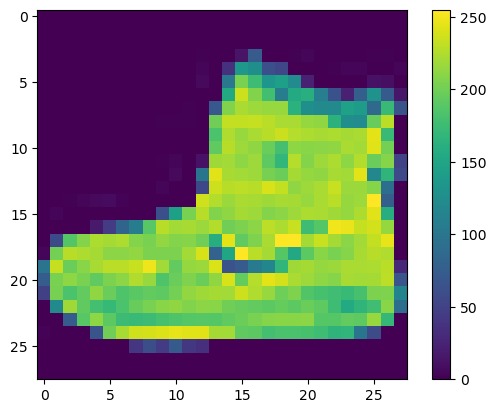

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

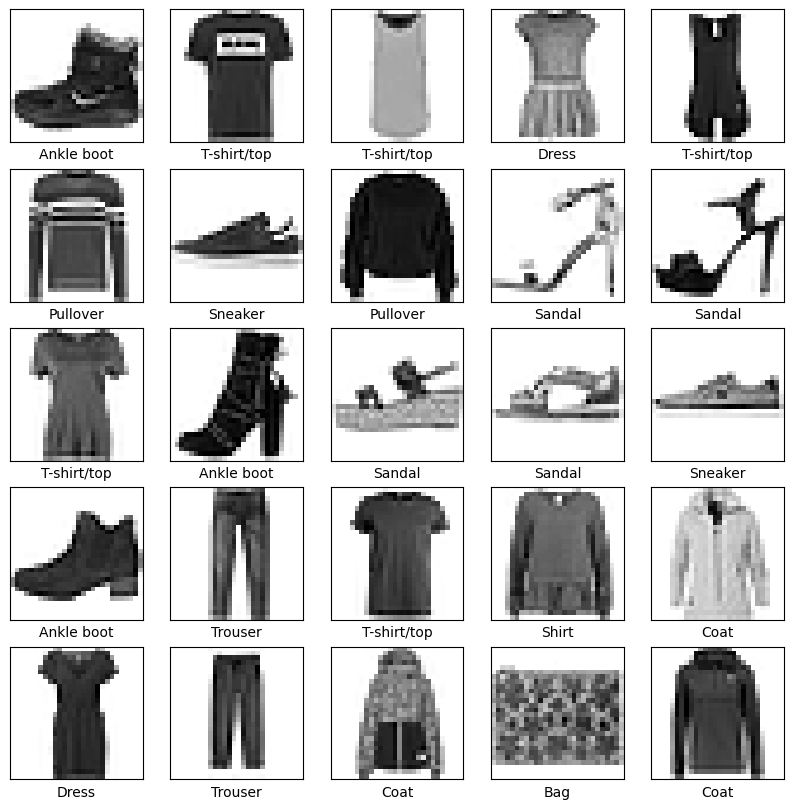

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Reformats from 2D (28p x 28p) to (28p*28p = 784p)
    tf.keras.layers.Dense(128, activation='relu'), # Creates a web of 128 connected neurons
    tf.keras.layers.Dense(10) # Array with 10 neurons, each containing class_names.
])

In [13]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [14]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5005 - accuracy: 0.8260
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3782 - accuracy: 0.8633
Epoch 3/100
1875/1875 [==============================] - 2s 954us/step - loss: 0.3401 - accuracy: 0.8767
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8852
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2939 - accuracy: 0.8914
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.8969
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9010
Epoch 8/100
1875/1875 [==============================] - 2s 993us/step - loss: 0.2574 - accuracy: 0.9047
Epoch 9/100
1875/1875 [==============================] - 2s 998us/step - loss: 0.2466 - accuracy: 0.9086
Epoch 10/100
1875/1875 [==============================] - 2s 983us/

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # This represents overfitting

313/313 - 0s - loss: 0.7608 - accuracy: 0.8896 - 405ms/epoch - 1ms/step

Test accuracy: 0.8895999789237976


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 746us/step


In [18]:
predictions[0] # Array of 10 numbers each representing models confidence that this particular image is that exact label

array([2.29531823e-30, 6.35120088e-38, 1.15106565e-33, 0.00000000e+00,
       8.23915517e-38, 1.39992947e-15, 0.00000000e+00, 5.71170472e-11,
       2.12123363e-32, 9.99999940e-01], dtype=float32)

In [19]:
np.argmax(predictions[0]) # Model is confident that the image is class_names[9]

9

In [20]:
test_labels[0] # And its right

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i] # Gets the trye label and image data for specified index
  plt.grid(False) # turs off grid lines
  plt.xticks([]) # removes x axis
  plt.yticks([]) # removes y axis

  plt.imshow(img, cmap=plt.cm.binary) # Used to display image, it takes img as image data and specifies that the color map should be black and white

  predicted_label = np.argmax(predictions_array) # finds the index of the maximum value in "predictions_array"
  
  if predicted_label == true_label: # This block determines the color for the label based on whether the predicted label 
    color = 'blue'                  # matches the true label. If they match, the color is set to blue. Otherwise, it's set to 
  else:                             # red.
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # Sets the label for the x-axis. It includes the 
                                100*np.max(predictions_array),       # label, confidence percentage, and the true label in 
                                class_names[true_label]),            # the specified format. The color is determined by the 
                                color=color)                         # previously defined "color" variable.

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10)) # Specifies the x-axis ticks for each class
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") # Bar chart representing the predicted probs for each class.
  plt.ylim([0, 1]) # sets the y-axis limits to be inbetween 0 and 1, representing the probability range
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

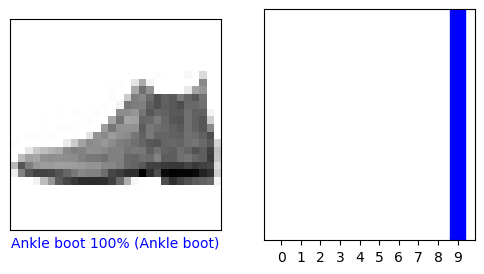

In [24]:
i = 0 # Images index
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

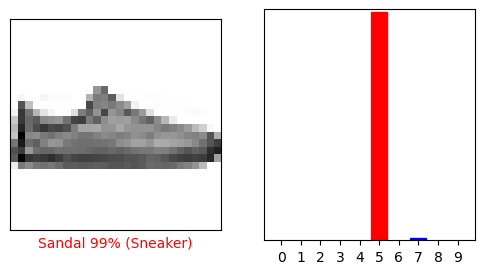

In [25]:
i = 12 # Images index
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

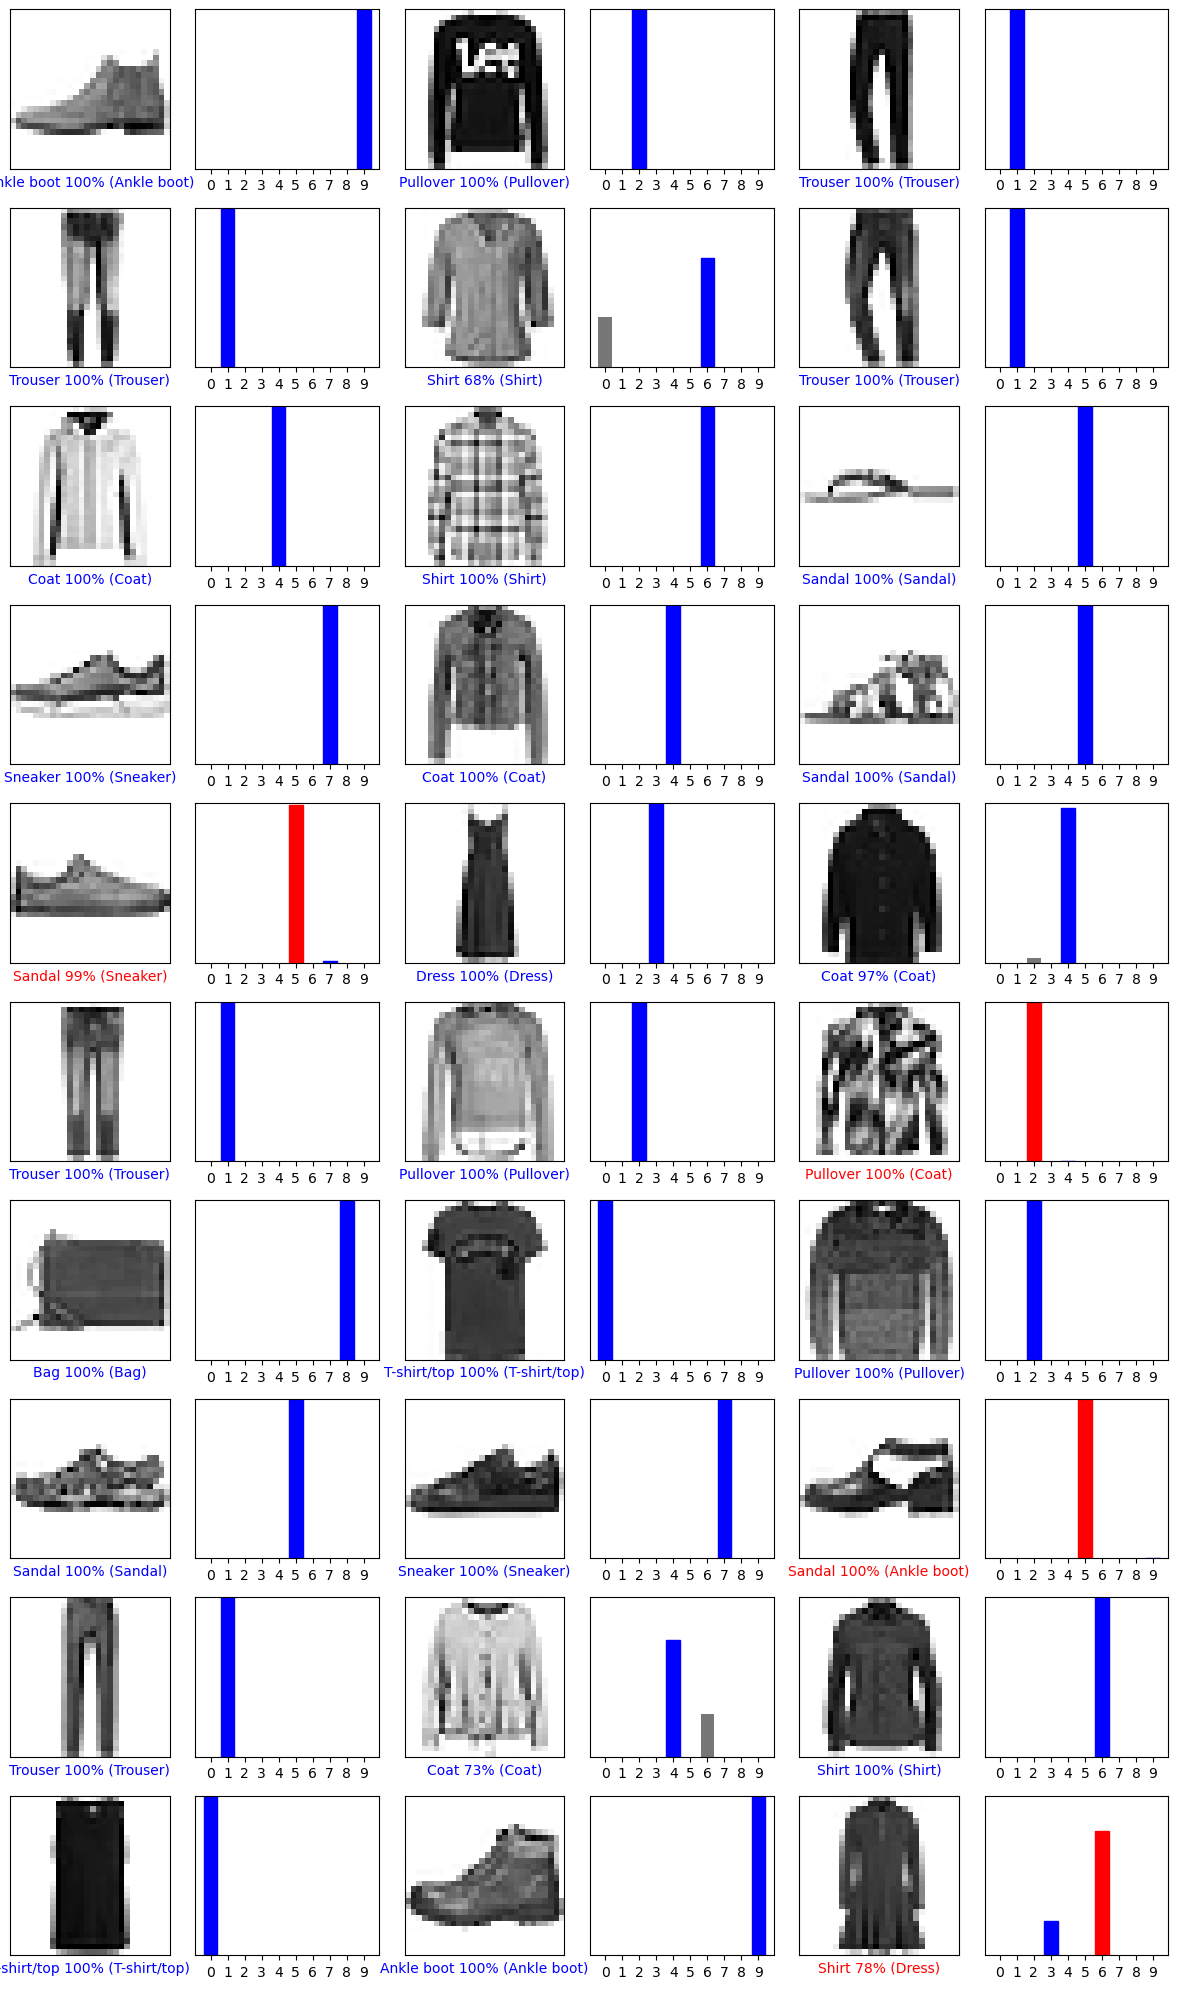

In [28]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [29]:
img = test_images[1] # Grabs an image from the test dataset

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[1.9224208e-08 1.1249763e-33 1.0000000e+00 9.6996332e-28 3.6738729e-08
  2.1148304e-21 2.0061066e-11 1.8687796e-31 8.1494836e-21 5.0349183e-31]]


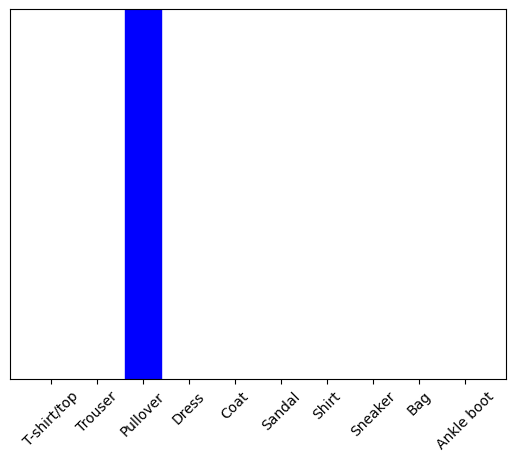

In [39]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [40]:
np.argmax(predictions_single[0])

2